Colorization

In [12]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.preprocessing import image as kp_image
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, UpSampling2D, InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import  array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image

In [15]:
img = Image.open('/Users/apple/python/SkillFactory/Ml_learning/selfedu_lessons/cerasss/colorcats.png')


def precossed_image(img):
    # Ensure the image is in RGB mode (remove alpha channel if it exists)
    img = img.convert("RGB")
    image = img.resize((256, 256), Image.BILINEAR)
    image = np.array(image, dtype=float)
    size = image.shape
    lab = rgb2lab(1.0 / 255 * image)
    x, y = lab[:, :, 0], lab[:, :, 1:]

    y /= 128
    x = x.reshape(1, size[0], size[1], 1)
    y = y.reshape(1, size[0], size[1], 2)
    return x, y, size

In [16]:
x, y, size = precossed_image(img)

In [19]:
model = Sequential()
model.add(InputLayer(shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [20]:
model.compile(optimizer='adam', loss='mse')
model.fit(x=x, y=y, batch_size=1, epochs=50)

Epoch 1/50


2024-12-21 19:02:10.375321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.1071
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 0.5711
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.9404
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.2588
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0434
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 0.0252
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.0236
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.0230
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 0.0213
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.0173
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.0316
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.0163
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.0181
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0194
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.0195
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━

In [27]:
img2 = Image.open('/Users/apple/python/SkillFactory/Ml_learning/selfedu_lessons/cerasss/uncolorcats.png')
x, y, size = precossed_image(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


/var/folders/07/56f70q6n70d3v657jsy7fjgr0000gn/T/ipykernel_65903/2565066028.py:13: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 63 negative Z values that have been clipped to zero
  plt.imshow(lab2rgb(cur))


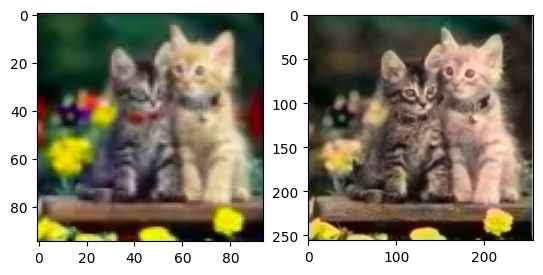

In [28]:
output = model.predict(x)
output *= 128

min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(x[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))